<a href="https://colab.research.google.com/github/mdatta17/Work/blob/master/Music_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import missingno as msno
%matplotlib inline

In [55]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [56]:
train =pd.read_csv("/content/gdrive/My Drive//Music/train.csv")
test = pd.read_csv('/content/gdrive/My Drive//Music/test.csv')
songs = pd.read_csv('/content/gdrive/My Drive//Music/songs.csv')
members= pd.read_csv('/content/gdrive/My Drive//Music/members.csv')

In [57]:
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


In [58]:
songs.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52


In [59]:
members.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613


In [60]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19999 entries, 0 to 19998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   msno                19999 non-null  object
 1   song_id             19999 non-null  object
 2   source_system_tab   19932 non-null  object
 3   source_screen_name  19423 non-null  object
 4   source_type         19949 non-null  object
 5   target              19999 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 937.6+ KB


In [61]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39999 entries, 0 to 39998
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   song_id      39999 non-null  object
 1   song_length  39999 non-null  int64 
 2   genre_ids    39282 non-null  object
 3   artist_name  39999 non-null  object
 4   composer     23203 non-null  object
 5   lyricist     10913 non-null  object
 6   language     39999 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 2.1+ MB


In [62]:
members.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34403 entries, 0 to 34402
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   msno                    34403 non-null  object
 1   city                    34403 non-null  int64 
 2   bd                      34403 non-null  int64 
 3   gender                  14501 non-null  object
 4   registered_via          34403 non-null  int64 
 5   registration_init_time  34403 non-null  int64 
 6   expiration_date         34403 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 1.8+ MB


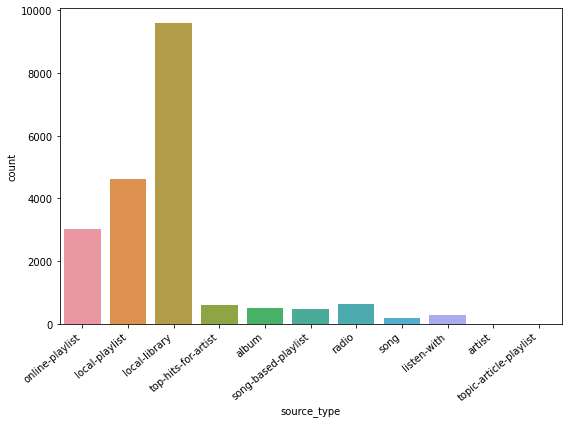

In [63]:
import seaborn as sns
plt.figure(figsize=(8,6))
ax= sns.countplot(x='source_type', data=train)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.tight_layout()
plt.show()

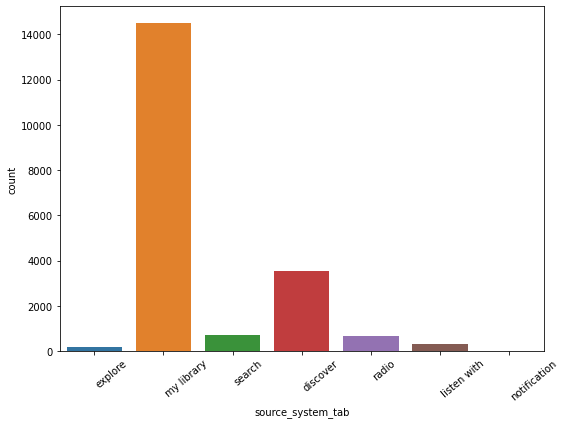

In [64]:
import seaborn as sns
plt.figure(figsize=(8,6))
ax= sns.countplot(x='source_system_tab', data=train)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='left')
plt.tight_layout()
plt.show()

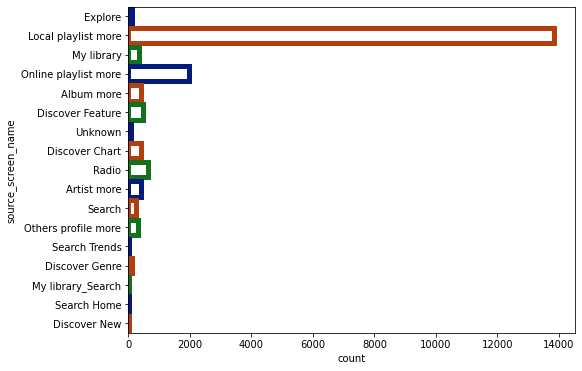

In [65]:
plt.figure(figsize=(8,6))
ax=sns.countplot(y=train['source_screen_name'],data=train, facecolor=(0,0,0,0), linewidth =5,
                edgecolor= sns.color_palette('dark',3))
plt.show()

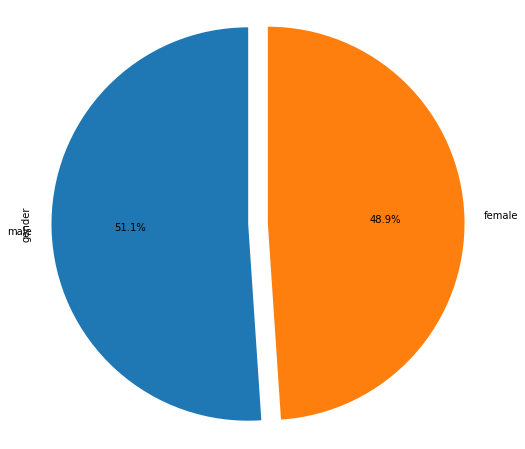

In [66]:
plt.figure(figsize=(8,8))
pp= pd.value_counts(members.gender)
pp.plot.pie(startangle=90, autopct='%1.1f%%', shadow= False, explode= (0.05,0.05))
plt.axis('equal')
plt.show()

Merging the training & test datasets

In [67]:
train_members = pd.merge(train, members, on='msno', how='inner')
train_merged= pd.merge(train_members, songs, on='song_id', how='outer')
print(train_merged.head())
print(len(train_merged.columns))
print('\n')


test_members = pd.merge(test, members, on='msno', how='inner')
test_merged= pd.merge(test_members, songs, on='song_id', how='outer')
print(test_merged.head())
print(len(test_merged.columns))

                                           msno  ... language
0  FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=  ...      NaN
1  FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=  ...      NaN
2  FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=  ...     52.0
3  hZyOA+0yqClPLt6uIEndf8fG8szH/95eKMbaxLE5z30=  ...     52.0
4  FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=  ...      NaN

[5 rows x 18 columns]
18


       id                                          msno  ... lyricist language
0     0.0  V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=  ...      NaN      NaN
1  2954.0  mp5bRgC7VAhEpWlAiOn4jG8CD9FJZt7725f93t5i99M=  ...      NaN      NaN
2     1.0  V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=  ...  孫燕姿/易家揚      3.0
3   633.0  JXkYMYNrobJ3hctOnaKNM7NbhgmyxEWJZTBD4yehfCU=  ...  孫燕姿/易家揚      3.0
4  1745.0  yyDmZtawawvo2eqiFUlQbvmvHied65Ye+6KsMEpmoho=  ...  孫燕姿/易家揚      3.0

[5 rows x 18 columns]
18


In [68]:
print(train_merged.columns.to_series().groupby(train_merged.dtypes).groups)

{dtype('float64'): Index(['target', 'city', 'bd', 'registered_via', 'registration_init_time',
       'expiration_date', 'song_length', 'language'],
      dtype='object'), dtype('O'): Index(['msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'gender', 'genre_ids', 'artist_name', 'composer',
       'lyricist'],
      dtype='object')}


In [69]:
print(test_merged.columns.to_series().groupby(test_merged.dtypes).groups)

{dtype('float64'): Index(['id', 'city', 'bd', 'registered_via', 'registration_init_time',
       'expiration_date', 'song_length', 'language'],
      dtype='object'), dtype('O'): Index(['msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'gender', 'genre_ids', 'artist_name', 'composer',
       'lyricist'],
      dtype='object')}


A function to check for null values

In [70]:
def check_null_values(df):
    print(df.isnull().values.any())
    if (df.isnull().values.any()== True):
        columns_with_Nan = df.columns[df.isnull().any()].tolist()
        print(columns_with_Nan)
        for col in columns_with_Nan:
            print('%s : %d' %(col,df[col].isnull().sum()))

check_null_values(train_merged)

True
['msno', 'source_system_tab', 'source_screen_name', 'source_type', 'target', 'city', 'bd', 'gender', 'registered_via', 'registration_init_time', 'expiration_date', 'song_length', 'genre_ids', 'artist_name', 'composer', 'lyricist', 'language']
msno : 38665
source_system_tab : 38732
source_screen_name : 39241
source_type : 38715
target : 38665
city : 38665
bd : 38665
gender : 46377
registered_via : 38665
registration_init_time : 38665
expiration_date : 38665
song_length : 17154
genre_ids : 17895
artist_name : 17154
composer : 34148
lyricist : 46653
language : 17154


In [71]:
check_null_values(test_merged)

True
['id', 'msno', 'source_system_tab', 'source_screen_name', 'source_type', 'city', 'bd', 'gender', 'registered_via', 'registration_init_time', 'expiration_date', 'song_length', 'genre_ids', 'artist_name', 'composer', 'lyricist', 'language']
id : 39524
msno : 39524
source_system_tab : 39527
source_screen_name : 39742
source_type : 39526
city : 39524
bd : 39524
gender : 41665
registered_via : 39524
registration_init_time : 39524
expiration_date : 39524
song_length : 4298
genre_ids : 5017
artist_name : 4298
composer : 21113
lyricist : 33461
language : 4298


Replacing null and float values with integer -5.

In [72]:
def replace_Nan_non_object(df):
    object_cols=list(df.select_dtypes(include=['float']).columns)
    for col in object_cols:
        df[col]=df[col].fillna(np.int(-5))

replace_Nan_non_object(train_merged)
replace_Nan_non_object(test_merged)

Null values of dtype 'object'

In [73]:
def replace_Nan_object(df):
    object_cols=list(df.select_dtypes(include=['object']).columns)
    for col in object_cols:
        df[col]=df[col].fillna(' ')
    print(object_cols)

replace_Nan_object(train_merged)
replace_Nan_object(test_merged)

['msno', 'song_id', 'source_system_tab', 'source_screen_name', 'source_type', 'gender', 'genre_ids', 'artist_name', 'composer', 'lyricist']
['msno', 'song_id', 'source_system_tab', 'source_screen_name', 'source_type', 'gender', 'genre_ids', 'artist_name', 'composer', 'lyricist']


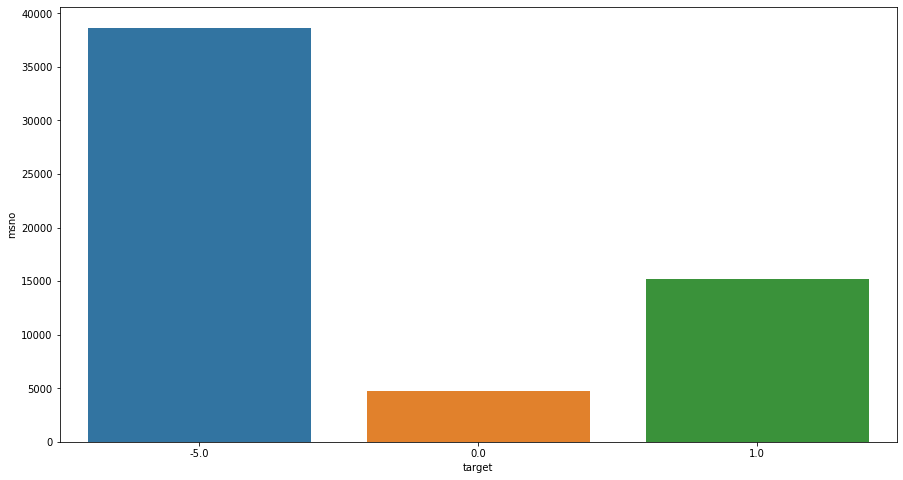

In [74]:
data = train_merged.groupby('target').aggregate({'msno':'count'}).reset_index()
a4_dims=(15,8)
fig,ax=plt.subplots(figsize=a4_dims)
ax= sns.barplot(x='target',y='msno',data=data)

In [75]:
train_merged= train_merged[train_merged.target != -5]
len(train_merged.index)

19999

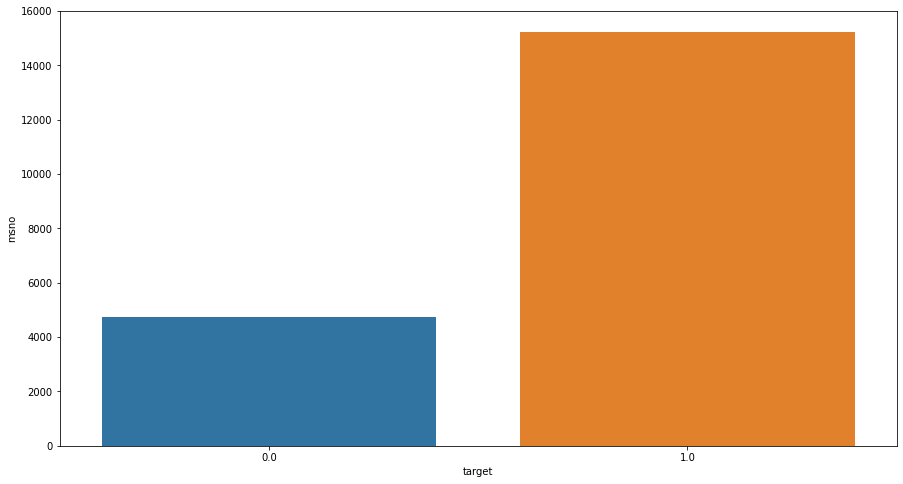

In [76]:
data = train_merged.groupby('target').aggregate({'msno':'count'}).reset_index()
a4_dims=(15,8)
fig,ax=plt.subplots(figsize=a4_dims)
ax= sns.barplot(x='target',y='msno',data=data)

[Text(0, 0, '-5.0'),
 Text(0, 0, '-1.0'),
 Text(0, 0, '3.0'),
 Text(0, 0, '10.0'),
 Text(0, 0, '17.0'),
 Text(0, 0, '24.0'),
 Text(0, 0, '31.0'),
 Text(0, 0, '52.0'),
 Text(0, 0, '59.0')]

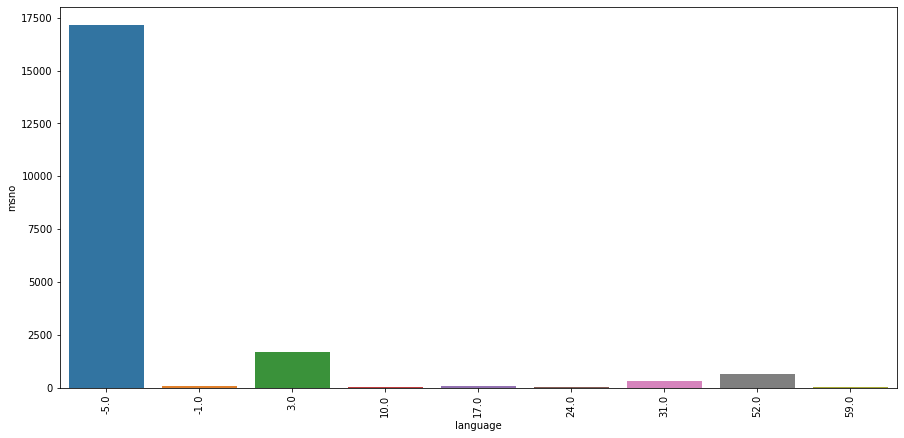

In [77]:
data = train_merged.groupby('language').aggregate({'msno':'count'}).reset_index()
a4_dims=(15,7)
fig, ax= plt.subplots(figsize=a4_dims)
ax= sns.barplot(x='language', y='msno', data= data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

[Text(0, 0, '1.0'),
 Text(0, 0, '3.0'),
 Text(0, 0, '4.0'),
 Text(0, 0, '5.0'),
 Text(0, 0, '6.0'),
 Text(0, 0, '7.0'),
 Text(0, 0, '8.0'),
 Text(0, 0, '9.0'),
 Text(0, 0, '10.0'),
 Text(0, 0, '11.0'),
 Text(0, 0, '12.0'),
 Text(0, 0, '13.0'),
 Text(0, 0, '14.0'),
 Text(0, 0, '15.0'),
 Text(0, 0, '16.0'),
 Text(0, 0, '17.0'),
 Text(0, 0, '18.0'),
 Text(0, 0, '20.0'),
 Text(0, 0, '21.0'),
 Text(0, 0, '22.0')]

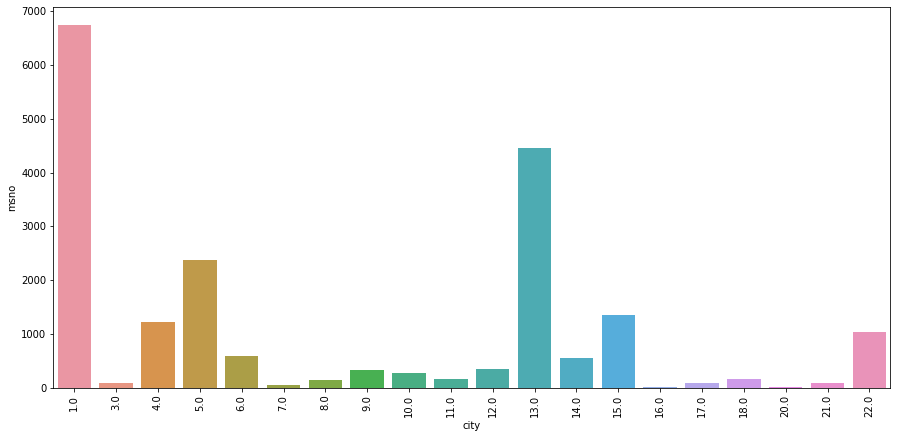

In [78]:
data = train_merged.groupby('city').aggregate({'msno':'count'}).reset_index()
a4_dims=(15,7)
fig, ax= plt.subplots(figsize=a4_dims)
ax= sns.barplot(x='city', y='msno', data= data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

Building the model

In [79]:
df= pd.read_csv('/content/gdrive/My Drive//Music/train.csv')
df = df.sample(frac= 0.1)
songs = pd.read_csv('/content/gdrive/My Drive//Music/songs.csv')
members= pd.read_csv('/content/gdrive/My Drive//Music/members.csv')


In [80]:
df= pd.merge(df, songs, on='song_id', how='left')
df = pd.merge(df, members, on='msno', how='left')

del songs
del members

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   msno                    2000 non-null   object 
 1   song_id                 2000 non-null   object 
 2   source_system_tab       1991 non-null   object 
 3   source_screen_name      1934 non-null   object 
 4   source_type             1995 non-null   object 
 5   target                  2000 non-null   int64  
 6   song_length             281 non-null    float64
 7   genre_ids               272 non-null    object 
 8   artist_name             281 non-null    object 
 9   composer                230 non-null    object 
 10  lyricist                180 non-null    object 
 11  language                281 non-null    float64
 12  city                    2000 non-null   int64  
 13  bd                      2000 non-null   int64  
 14  gender                  1224 non-null   

In [82]:
df.isnull().sum()/df.isnull().count()*100

msno                       0.00
song_id                    0.00
source_system_tab          0.45
source_screen_name         3.30
source_type                0.25
target                     0.00
song_length               85.95
genre_ids                 86.40
artist_name               85.95
composer                  88.50
lyricist                  91.00
language                  85.95
city                       0.00
bd                         0.00
gender                    38.80
registered_via             0.00
registration_init_time     0.00
expiration_date            0.00
dtype: float64

Replacing the null values

In [83]:
for i in df.select_dtypes(include=['object']).columns:
    df[i][df[i].isnull()]='unknown'
df= df.fillna(value=0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Creating Registration and expiration dates

In [84]:
df.registration_init_time = pd.to_datetime(df.registration_init_time, format='%Y%m%d', errors='ignore')
df['registration_init_time_year'] = df['registration_init_time'].dt.year
df['registration_init_time_month'] = df['registration_init_time'].dt.month
df['registration_init_time_day'] = df['registration_init_time'].dt.day

df.expiration_date = pd.to_datetime(df.expiration_date,  format='%Y%m%d', errors='ignore')
df['expiration_date_year'] = df['expiration_date'].dt.year
df['expiration_date_month'] = df['expiration_date'].dt.month
df['expiration_date_day'] = df['expiration_date'].dt.day

In [85]:
df['registration_init_time'] = df['registration_init_time'].astype('category')
df['expiration_date'] = df['expiration_date'].astype('category')

In [86]:
for col in df.select_dtypes(include=['object']).columns:
    df[col]= df[col].astype('category')

In [87]:
for col in df.select_dtypes(include=['category']).columns:
    df[col]=df[col].cat.codes

In [88]:
df=df.drop(['expiration_date', 'lyricist'], 1)

In [89]:
df.columns

Index(['msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'target', 'song_length', 'genre_ids', 'artist_name',
       'composer', 'language', 'city', 'bd', 'gender', 'registered_via',
       'registration_init_time', 'registration_init_time_year',
       'registration_init_time_month', 'registration_init_time_day',
       'expiration_date_year', 'expiration_date_month', 'expiration_date_day'],
      dtype='object')

In [90]:
target = df.pop('target')

In [91]:
target

0       1
1       0
2       1
3       0
4       0
       ..
1995    0
1996    1
1997    1
1998    0
1999    1
Name: target, Length: 2000, dtype: int64

In [92]:
from sklearn import model_selection, metrics, ensemble
from xgboost.sklearn import XGBClassifier

In [93]:
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(df, target, test_size= 0.3)
del df

Radom Forest model

In [94]:
model = ensemble.RandomForestClassifier(n_estimators=250, max_depth =25)
model.fit(train_data, train_labels)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=25, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=250,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [95]:
model_pred= model.predict(test_data)
print(metrics.accuracy_score(test_labels, model_pred))

0.7583333333333333


XG Boost clssifier

In [96]:
model1= XGBClassifier(learning_rate=0.1, max_depth= 15, min_child_weight=5,n_estimators= 250)
model1.fit(train_data, train_labels)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=15,
              min_child_weight=5, missing=None, n_estimators=250, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [97]:
model1_pred= model1.predict(test_data)
print(metrics.accuracy_score(test_labels, model1_pred))

0.7516666666666667
